In [1]:
import pandas as pd
import numpy as np
try:
    import cPickle as pickle
except ImportError:
    import _pickle as pickle


In [2]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('D:/MIMICIII/Created Data/Fresh_start/rl_train_set_scaled_rewarded_abchange.csv')

In [4]:
def drop_nan(df):
    list_of_nan = []
    for i, row in df.iterrows():
        if pd.isnull(row["bloc"]):
            #print(i)
            list_of_nan.append(i)
            #print(list_of_nan)
    df = df.drop(list_of_nan)
    return df

In [5]:
df_train = drop_nan(df_train)

In [6]:
df_val = pd.read_csv('D:/MIMICIII/Created Data/Fresh_start/rl_val_set_scaled_rewarded_abchange.csv')
df_val = drop_nan(df_val)

In [7]:
df_test = pd.read_csv('D:/MIMICIII/Created Data/Fresh_start/rl_test_set_scaled_rewarded_abchange.csv')
df_test = drop_nan(df_test)

In [8]:
df_orig = pd.read_csv('D:/MIMICIII/Matlab/MIMIC_mimiciii.csv')
df_orig = drop_nan(df_orig)
for i, row in df_orig.iterrows():
    if pd.isnull(row["mortality_90d"]):
        df_orig.at[i, "mortality_90d"] = 0

In [9]:
print(len(df_orig.index), df_orig['icustayid'].nunique(), df_train['icustayid'].nunique(), df_test['icustayid'].nunique(), df_val['icustayid'].nunique())

278578 20956 14669 4192 2095


In [10]:
df_train.head()

,index,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,...,output_4hourly,cumulated_balance,SOFA,SIRS,vaso_input,iv_input,action,reward,max_dose_vaso_unnorm,abchange_vc
0,0,0.000000,3,7245486000,0.0,0.412268,0.0,0.0,0.0,NaN,...,0.728838,0.382109,0.26087,0.50,0.0,2.0,10,1.303074,0.0,0.0
1,1,0.222560,3,7245500400,0.0,0.412268,0.0,0.0,0.0,NaN,...,0.698697,0.381732,0.26087,0.50,0.0,2.0,10,-0.025000,0.0,0.0
2,2,0.356608,3,7245514800,0.0,0.412268,0.0,0.0,0.0,NaN,...,0.676123,0.381457,0.26087,0.50,0.0,2.0,10,-0.025000,0.0,0.0
3,3,0.452837,3,7245529200,0.0,0.412268,0.0,0.0,0.0,NaN,...,0.692656,0.381110,0.26087,0.25,0.0,2.0,10,-0.025000,0.0,0.0
4,4,0.527957,3,7245543600,0.0,0.412268,0.0,0.0,0.0,NaN,...,0.732052,0.380524,0.26087,0.50,0.0,2.0,10,-0.025000,0.0,0.0


In [11]:
deeprl2_testactions = pickle.load(open("C:/Users/sianc/Documents/PhD/First Year/vasochange4_dqn_normal_10/dqn_normal_actions_test.p", "rb"  ))

In [12]:
deeprl2_valactions = pickle.load(open( "C:/Users/sianc/Documents/PhD/First Year/vasochange4_dqn_normal_10/dqn_normal_actions_val.p", "rb" ))

In [13]:
deeprl2_trainactions = pickle.load(open( "C:/Users/sianc/Documents/PhD/First Year/vasochange4_dqn_normal_10/dqn_normal_actions_train.p", "rb" ))

In [14]:
inv_action_map = {}
count = 0
for i in range(5):
    for j in range(5):
        inv_action_map[count] = [i,j]
        count += 1

In [15]:
#inv_action_map

In [16]:
test_actions_arr = np.array([inv_action_map[i] for i in deeprl2_testactions])

val_actions_arr = np.array([inv_action_map[i] for i in deeprl2_valactions])

train_actions_arr = np.array([inv_action_map[i] for i in deeprl2_trainactions])

In [17]:
df_test['agent_iv'] = test_actions_arr[:,0]
df_test['agent_vaso'] = test_actions_arr[:,1]

df_val['agent_iv'] = val_actions_arr[:,0]
df_val['agent_vaso'] = val_actions_arr[:,1]

df_train['agent_iv'] = train_actions_arr[:,0]
df_train['agent_vaso'] = train_actions_arr[:,1]

In [18]:
df_train.head()

,index,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,...,SOFA,SIRS,vaso_input,iv_input,action,reward,max_dose_vaso_unnorm,abchange_vc,agent_iv,agent_vaso
0,0,0.000000,3,7245486000,0.0,0.412268,0.0,0.0,0.0,NaN,...,0.26087,0.50,0.0,2.0,10,1.303074,0.0,0.0,3,1
1,1,0.222560,3,7245500400,0.0,0.412268,0.0,0.0,0.0,NaN,...,0.26087,0.50,0.0,2.0,10,-0.025000,0.0,0.0,3,1
2,2,0.356608,3,7245514800,0.0,0.412268,0.0,0.0,0.0,NaN,...,0.26087,0.50,0.0,2.0,10,-0.025000,0.0,0.0,1,0
3,3,0.452837,3,7245529200,0.0,0.412268,0.0,0.0,0.0,NaN,...,0.26087,0.25,0.0,2.0,10,-0.025000,0.0,0.0,1,0
4,4,0.527957,3,7245543600,0.0,0.412268,0.0,0.0,0.0,NaN,...,0.26087,0.50,0.0,2.0,10,-0.025000,0.0,0.0,1,0


In [19]:
rl_data = pd.concat([df_train, df_test],ignore_index=True, axis=0)

In [20]:
rl_data = pd.concat([rl_data, df_val], ignore_index=True, axis =0)

In [21]:
rl_data.shape

(278578, 68)

In [22]:
##### extract the columns of interest to examine the feature importance
state_features_vc_clinician = ['gender','mechvent','re_admission', 'age','Weight_kg','GCS','HR','SysBP','MeanBP',
                  'DiaBP','RR','Temp_C','FiO2_1','Potassium','Sodium','Chloride','Glucose','Magnesium','Calcium','Hb',
                  'WBC_count','Platelets_count','PTT','PT','Arterial_pH','paO2','paCO2','Arterial_BE','HCO3',
                  'Arterial_lactate','SOFA','SIRS','Shock_Index','PaO2_FiO2','cumulated_balance', 'SpO2','BUN',
                  'Creatinine','SGOT','SGPT','Total_bili','INR','input_total','input_4hourly','output_total', 
                  'output_4hourly', 'vaso_input']

In [23]:
state_features_vc_ai = ['gender','mechvent','re_admission', 'age','Weight_kg','GCS','HR','SysBP','MeanBP',
                  'DiaBP','RR','Temp_C','FiO2_1','Potassium','Sodium','Chloride','Glucose','Magnesium','Calcium','Hb',
                  'WBC_count','Platelets_count','PTT','PT','Arterial_pH','paO2','paCO2','Arterial_BE','HCO3',
                  'Arterial_lactate','SOFA','SIRS','Shock_Index','PaO2_FiO2','cumulated_balance', 'SpO2','BUN',
                  'Creatinine','SGOT','SGPT','Total_bili','INR','input_total','input_4hourly','output_total', 
                  'output_4hourly', 'agent_vaso']

In [24]:
df_clinician = rl_data[state_features_vc_clinician]
df_ai = rl_data[state_features_vc_ai]

In [25]:
labels_clinician = np.array(df_clinician['vaso_input'])
labels_clinician[labels_clinician > 0] = 1 
df_clinician['vaso_input'] = labels_clinician

labels_ai = np.array(df_ai['agent_vaso'])
labels_ai[labels_ai > 0] = 1 
df_ai['agent_vaso'] = labels_ai

C:\Users\sianc\anaconda3\envs\willthiswork\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sianc\anaconda3\envs\willthiswork\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [26]:
def too_large(df):
    df = df.astype(np.float32)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df = df.fillna(0)
    return df
#print(df_clinician['vaso_input'].dtype)

In [27]:
y_train = df_clinician['vaso_input']
X_train = df_clinician.drop('vaso_input', axis = 1)
y_train = too_large(y_train)
X_train = too_large(X_train)

In [28]:
y_train1 = df_ai['agent_vaso']
X_train1 = df_ai.drop('agent_vaso', axis = 1)
y_train1 = too_large(y_train1)
X_train1 = too_large(X_train1)

In [29]:
clf = RandomForestClassifier(n_estimators=100,  n_jobs=-1, oob_score = True, bootstrap = True, random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [30]:
clf1 = RandomForestClassifier(n_estimators=100,  n_jobs=-1, oob_score = True, bootstrap = True, random_state=42)
clf1.fit(X_train1,y_train1)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [31]:
from sklearn.ensemble._forest import _generate_unsampled_indices
def oob_classifier_accuracy(clf, X_train, y_train):
    """
    Compute out-of-bag (OOB) accuracy for a scikit-learn random forest
    classifier. We learned the guts of scikit's RF from the BSD licensed
    code:
    https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/ensemble/forest.py#L425
    """
    X = X_train.values
    y = y_train.values

    n_samples = len(X)
    n_classes = len(np.unique(y))
    predictions = np.zeros((n_samples, n_classes))
    for tree in clf.estimators_:
        unsampled_indices = _generate_unsampled_indices(tree.random_state, n_samples, n_samples)
        tree_preds = tree.predict_proba(X[unsampled_indices, :])
        predictions[unsampled_indices] += tree_preds

    predicted_class_indexes = np.argmax(predictions, axis=1)
    predicted_classes = [clf.classes_[i] for i in predicted_class_indexes]

    oob_score = np.mean(y == predicted_classes)
    return oob_score

In [32]:

from sklearn.ensemble._forest import _generate_unsampled_indices
def oob_classifier_accuracy1(clf1, X_train1, y_train1):
    """
    Compute out-of-bag (OOB) accuracy for a scikit-learn random forest
    classifier. We learned the guts of scikit's RF from the BSD licensed
    code:
    https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/ensemble/forest.py#L425
    """
    X = X_train1.values
    y = y_train1.values

    n_samples = len(X)
    n_classes = len(np.unique(y))
    predictions = np.zeros((n_samples, n_classes))
    for tree in clf1.estimators_:
        unsampled_indices = _generate_unsampled_indices(tree.random_state, n_samples, n_samples)
        tree_preds = tree.predict_proba(X[unsampled_indices, :])
        predictions[unsampled_indices] += tree_preds

    predicted_class_indexes = np.argmax(predictions, axis=1)
    predicted_classes = [clf1.classes_[i] for i in predicted_class_indexes]

    oob_score = np.mean(y == predicted_classes)
    return oob_score

In [33]:
from sklearn.inspection import permutation_importance

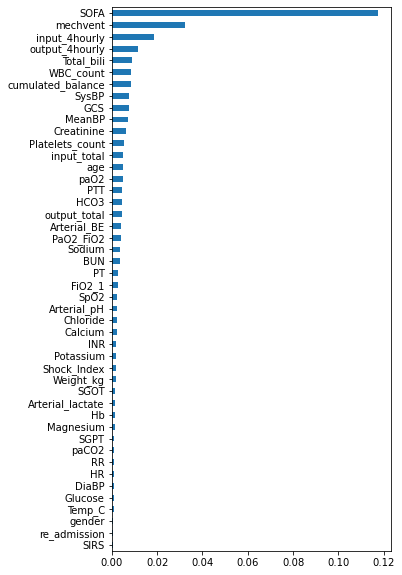

In [34]:
from sklearn.inspection import permutation_importance

result = permutation_importance(clf, X_train, y_train, n_repeats=10, scoring = oob_classifier_accuracy,
                                random_state=42)
#sorted_idx = result.importances_mean.argsort()
feat_importances_sk = pd.Series(result.importances_mean, index=X_train.columns)
feat_importances_sk = feat_importances_sk.sort_values(ascending=True)
feat_importances_sk.plot(kind='barh', figsize=(5,10))
plt.show()

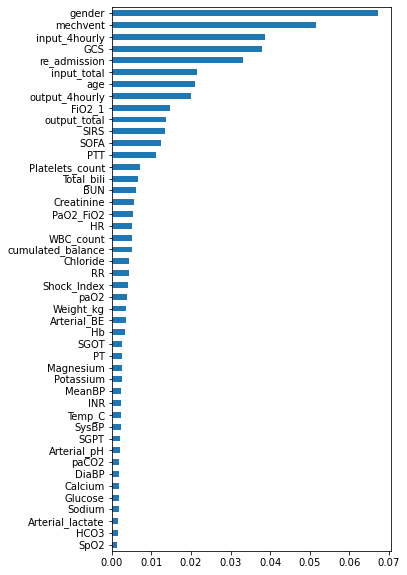

In [35]:
result1 = permutation_importance(clf1, X_train1, y_train1, n_repeats=10, scoring = oob_classifier_accuracy1,
                                random_state=42)

feat_importances_sk1 = pd.Series(result1.importances_mean, index=X_train1.columns)
feat_importances_sk1 = feat_importances_sk1.sort_values(ascending=True)
feat_importances_sk1.plot(kind='barh', figsize=(5,10))
plt.show()

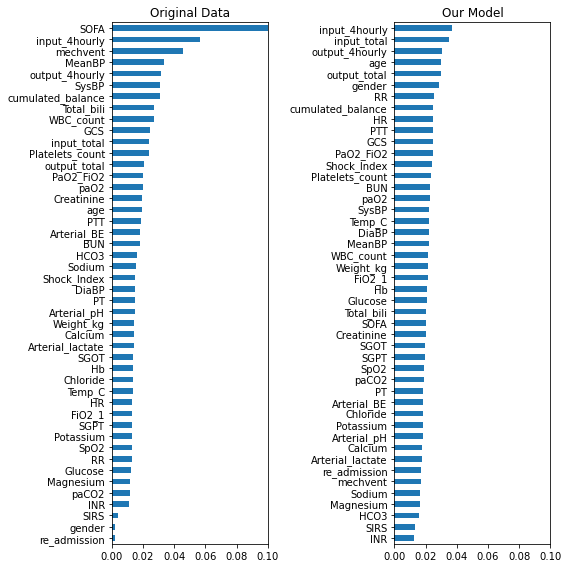

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances1 = pd.Series(clf1.feature_importances_, index=X_train1.columns)
feat_importances1 = feat_importances1.sort_values(ascending=True)
feat_importances.plot(ax=ax1, kind='barh')
feat_importances1.plot(ax=ax2, kind='barh')
ax1.set_title("Original Data")
ax1.set_xlim([0, 0.1])
ax2.set_title("Our Model")
ax2.set_xlim([0, 0.1])
fig.tight_layout()
plt.show()

In [40]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
#feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
#feat_importances = feat_importances.sort_values(ascending=True)

#feat_importances_sk.plot(ax=ax1, kind='barh')
#feat_importances_sk1.plot(ax=ax2, kind='barh')
#ax1.set_title("Clinician policy")
#ax1.set_xlim([0, 0.15])
#ax2.set_title("Modified policy")
#ax2.set_xlim([0, 0.15])
#fig.text(0.5, -0.02, 'Feature Importance', ha='center', fontsize=14)
#fig.text(-0.02, 0.5, 'Features', va='center', rotation='vertical', fontsize = 15)
#fig.tight_layout()
#plt.show()

In [41]:
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(clf, cv = None, scoring = oob_classifier_accuracy, refit = False, n_iter = 10).fit(X_train, y_train)
feat_importances_eli = pd.Series(perm.feature_importances_, index=X_train.columns)
feat_importances_elitt = feat_importances_eli.sort_values(ascending=True)
feat_importances_elitt.plot(kind='barh', figsize=(5,10))
plt.show()

ModuleNotFoundError: No module named 'eli5'

In [ ]:
perm1 = PermutationImportance(clf1, cv = None, scoring = oob_classifier_accuracy1, refit = False, n_iter = 10).fit(X_train1, y_train1)
feat_importances_eli1 = pd.Series(perm1.feature_importances_, index=X_train1.columns)
feat_importances_eli1 = feat_importances_eli1.sort_values(ascending=True)
feat_importances_eli1.plot(kind='barh', figsize=(5,10))
plt.show()

In [ ]:
from rfpimp import permutation_importances
perm_imp_rfpimp = permutation_importances(clf, X_train, y_train, oob_classifier_accuracy, n_samples=X_train.shape[0])
perm_imp_rfpimp = perm_imp_rfpimp.sort_values(by = 'Importance', ascending=True)
perm_imp_rfpimp.plot(kind='barh', figsize=(5,10))

In [ ]:
from rfpimp import permutation_importances
perm_imp_rfpimp1 = permutation_importances(clf1, X_train1, y_train1, oob_classifier_accuracy1, n_samples=X_train1.shape[0])
perm_imp_rfpimp1 = perm_imp_rfpimp1.sort_values(by = 'Importance', ascending=True)
perm_imp_rfpimp1.plot(kind='barh', figsize=(5,10))